<a href="https://colab.research.google.com/github/felipekei/Data-Analysis-and-Visualization-Project/blob/main/Proyecto_Analisis_Visualizacion_de_Datos_Felipe_Bedoya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Librerias a usar:

import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px

#Introducción y Problema#
Este proyecto se basa en un problema a solucionar teniendo en cuenta los conocimientos obtenidos a través del curso de Análisis y visualización de datos.

Se aplicarán algunas de las librerías revisadas para dar solución al problema de una compañía que quiere mejorar su satisfacción con su cliente, esto será descrito de forma más detallada en los siguientes puntos. Para este proyecto trataremos de usar la metodología CRISP-DM para hallar la solución del problema.



---



## Objetivo del Proyecto ##
El Objetivo general de este proyecto es el poder ***comprender los datos obtenidos de cierta compañia enfocados de las calificaciones de servicio al cliente en interacciones con agentes***. Para esto nos enfocaremos en dos objetivos:

*   Interpretar los datos obtenidos sobre los tipos de encuestas positivas y negativas de un grupo de agentes de idioma Español de servicio al cliente.
*   Analizar y comparar los resultados de encuestas de satisfacción entre meses basados en hipótesis.

En base a estos hallazgos se plantearán ciertos planes de acción aplicados por los lideres de cada equipo de la compañía, estos planes de mejora se escapan del alcance de este proyecto, pero sus resultados definitivamente estarán asociados con el objetivo del proyecto, y servirán entonces, como un pilar para su implementación.

Tendremos entonces, que analizar el tipo de negocio que vamos a trabajar y sus datos obtenidos, a continuación, encontraremos el objetivo del negocio.


## Objetivo del Negocio ##
Para este proyecto se necesita tener un entendimiento del negocio. El objetivo de la empresa, a la que denominaremos desde ahora como ***Compañia Alpha (CA)***, se esfuerza por traer la mejor experiencia de servicio al cliente de ciertos proyectos. Este servicio se provee con metodología de tercerización, la cual le da al cliente beneficios económicos, logísticos entre otros.

Entonces bien, su objetivo final es el de proveer al consumidor final con una buena experiencia al cliente, la cual es calificada en forma de encuestas de satisfacción que reciben la clasificación de buena o mala otorgada por el usuario durante o al final de la interacción (Chats y correos).



---




## Carga de datos ##
Subiremos los datos obtenidos de un periodo de tiempo de alrededor de seis meses aproximadamente. Recordando que no es posible físicamente posible obtener todas las encuestas de satisfacción por lo que nos basaremos en una muestra para nuestro proyecto.


In [ ]:
#@title Oculto para la grabación video
#IMPORTANTE revisar las notas finales de este proyecto para el manejo de datos

#Descarga automatica de Google Drive (no compartir)
!gdown --id 1fZXYxQve_tC71vki26zzJK0KpCeWIRqX

!gdown --id 1hadIUe2DD6M1xqtD79G999Ilc5hst-fG

!gdown --id 1vToOqzw9uAFquj3eOhrNc6wrZqWH11_D

In [ ]:
#Creamos la variable para nuestro primer dataFrame
df1 = pd.read_excel('data September-October 2022.xlsx')
df2 = pd.read_excel('data November-December 2022.xlsx')
df3 = pd.read_excel('data January-February 2023.xlsx')

In [ ]:
#Concatenamos los tres archivos
df = pd.concat([df1, df2, df3], ignore_index= True)
df.head(3)

,Ticket ID,Team Lead,Agent Name,CSAT Date,Language,Ticket Tier,Number Of Interactions,Workgroup,Feedback Rating,Channel,Primary Tag,Secondary Tag,# CSAT Surveys (Feedback Date & Owner)
0,20564351,Axelle Rakotonomenjanahary,Abdelfattah Azelmadi,2022-09-03,French,T1,1.0,FR General (T1),bad,Email,fn_gm_sh-content-management,--sony--,1
1,20588492,Axelle Rakotonomenjanahary,Abdelfattah Azelmadi,2022-09-06,French,T1,3.0,FR General (T1),good,Email,fn_ac_se-recovery,--acv-mail--,1
2,20588492,Axelle Rakotonomenjanahary,Abdelfattah Azelmadi,2022-09-06,French,T1,3.0,FR General (T1),good,Email,fn_ac_se-recovery,--compromise--,1




---



# Descripción de datos #
Para comenzar con la descripción de datos podemos ver que tenemos diferentes tipos de datos tanto como enteros, float y objecto. Hay que aclarar que no usaremos todos, ya que debemos realizar la limpieza de datos para hallar variables categóricas, valores que usaremos para graficar, entre otros.

In [ ]:
# df.info() # desmarcar para ver
for col in df.columns:
  print(col)

Ticket ID
Team Lead
Agent Name
CSAT Date
Language
Ticket Tier
Number Of Interactions
Workgroup
Feedback Rating
Channel
Primary Tag
Secondary Tag
# CSAT Surveys (Feedback Date & Owner)


Empecemos con la descripción de las columnas que tenemos a disposición:

*   **`Ticket ID`** Nos da el numero de la interacción independientemente si es un mail o chat.
*   **`Team Lead`** Indica el nombre del supervisor a cargo del agente.
*   **`Agent Name`** Indica el nombre del agente que recibió la encuesta de satisfacción.
*   **`Language`** Lenguaje en la que se manejó la interacción. Nótese que hay varios idiomas diferentes a los que vamos a analizar.
*   **`Ticket Tier`** Nivel en el que se manejo el ticket, en referencia a si requirió escalación o no. Se cuenta con tres niveles (T1 - T2 - T3). Nos enfocaremos a las de primer nivel.
*   **`Number Of Interactions`** Numero de respuestas enviadas por el agente.
*   **`Workgroup`** Indicador del canal, idioma y nivel en el que se manejo la interacción.
*   **`Feedback Rating`** Calificación dada por el cliente, se categoriza por ser **Buena**, **Mala** u Ofrecida (significa que se ofreció la encuesta, pero el cliente no dio ninguna calificación).
*   **`Channel`** Canal en el que se recibió la interacción, puede ser por correo (Email) o Chat.
*   **`Primary Tag`** Etiqueta hace referencia a una categorización interna que identifica el tipo de interacción que se recibió.
*   **`Secondary Tag`** Etiqueta hace referencia a una categorización secundaria interna que identifica las acciones tomadas en la interacción que se recibió.
*   **`# CSAT Surveys (Feedback Date & Owner)`** Columna que muestra la cantidad de encuestas de satisfacción dejadas durante la interacción (siempre será igual a 1).

Debido a la cantidad de datos que tenemos deberemos hacer una *limpieza de datos* que mostraremos en la siguiente sección.

## Limpieza de datos ##

Para poder realizar nuestro análisis deberemos realizar ciertos cambios para que la información presentada tenga más sentido, como a la vez sea más fácil de mostrar y digerir. Encontraremos entonces, varias líneas de código con su descripción en forma de comentario:

In [ ]:
#Eliminamos las columnas que no son de interés
df.drop('Ticket ID', inplace=True, axis=1)
df.drop('Ticket Tier', inplace=True, axis=1)
df.drop('Number Of Interactions', inplace=True, axis=1)
df.drop('# CSAT Surveys (Feedback Date & Owner)', inplace=True, axis=1)

In [ ]:
#Observamos que hay varios idiomas, por lo que filtraremos los idiomas que necesitamos
df['Workgroup'].value_counts()

EN General (T1)                 68591
ES General (T1)                 26653
PT General (T1)                 19188
DE General (T1)                 17272
FR General (T1)                 16511
                                ...  
Psyonix Specialists                 2
KO General (T1)                     2
TR Game Specialists (T2)            2
Report-A-Creator Escalations        1
T&S Leads                           1
Name: Workgroup, Length: 67, dtype: int64

In [ ]:
#Filtro de Español de los niveles que necesitamos (T1 y Chat)
df = df.loc[(df['Workgroup']=='ES General (T1)') | (df['Workgroup']=='ES Live Chat')]
df.head(3)

,Team Lead,Agent Name,CSAT Date,Language,Workgroup,Feedback Rating,Channel,Primary Tag,Secondary Tag
2190,Jose Franco,Alberto Elias-Romero,2022-09-02,Spanish,ES General (T1),good,Email,fn_gm_sh-content-management,--acv-mail--
2191,Jose Franco,Alberto Elias-Romero,2022-09-02,Spanish,ES General (T1),good,Email,fn_gm_sh-content-management,--compromise--
2192,Jose Franco,Alberto Elias-Romero,2022-09-03,Spanish,ES General (T1),good,Email,st_ac_se-recovery,--acv-mail--


In [ ]:
#Convertimos las encuestas que salen con el Rating de “offered” y las removemos del dataFrame

def remove_offered (df, columna, valor):
    df[columna] = df[columna].apply(lambda x: pd.NA if x == valor else x) #convierte en na el valor dado
    df.dropna(subset=[columna], inplace=True)#quita los resultados con na basados en la columna en específico
    return df

df_es = df.copy()
df_es = remove_offered(df_es, 'Feedback Rating', 'offered')

In [ ]:
#Removemos la columna Workgroup y Language ya que filtramos las interacciones y podemos usar la columna Channel
df_es.drop('Language', inplace=True, axis=1)
df_es.drop('Workgroup', inplace=True, axis=1)

In [ ]:
#Reemplazamos los valores de Good y Bad
df_es['Feedback Rating'] = df_es['Feedback Rating'].replace({'good': 1, 'bad': 0})

In [ ]:
#Tenemos que asegurarnos de eliminar el ruido, revisamos los supervisores
conteotl = df_es['Team Lead'].value_counts()
conteotl

Marco Hernandez            5478
Ariel Valdez               5034
Noe Mejia                  4210
Felipe Bedoya              3606
Jose Franco                3503
Daniel Ortiz               3334
Jose Briones               2661
Luis Vargas                2563
Rizter La Plana             522
Javier Pineda               379
Serhiy Kopyl                339
Timur Dorutin               304
Srdjan Kozomora             181
Daniela Castro              172
Julio Cesar Socher          130
Kiirana Hidalgo Schmitt     124
Gabriela Lauton Freire       62
Rolando Caldera              11
Lobsang Aguero                5
Maria Clara Carvalho          5
Aleksandar Sretenovic         3
Jonny Ehleiter                2
Bruno Soares                  2
Jason Van Os                  1
Derek Jimenez                 1
Yunus Yurtsever               1
Jan Croonen                   1
Carlos Castillo Handal        1
Name: Team Lead, dtype: int64

In [ ]:
#Eliminamos entonces los supervisores con poca cantidad de encuestas (ruido)
removetl = df_es['Team Lead'].isin(conteotl[conteotl > 12].index)
df_es = df_es[removetl]

In [ ]:
#También quitamos dos de los valores en específico, ya que no son supervisor
df_es.drop(df_es[(df_es['Team Lead'] == 'Rizter La Plana') | (df_es['Team Lead'] == 'Kiirana Hidalgo Schmitt')].index, inplace=True)

In [ ]:
#Finalmente cambiamos las columnas a su equivalente en Español
df_es = df_es.rename(columns={'Team Lead': 'Supervisor', 'Agent Name': 'Agente', 'CSAT Date': 'Fecha CSAT', 'Feedback Rating': 'Calificación', 'Channel': 'Canal', 'Primary Tag': 'Tag Primario', 'Secondary Tag': 'Tag Secundario'})

In [ ]:
#Resultado Final
df_es.sample(3)

,Supervisor,Agente,Fecha CSAT,Calificación,Canal,Tag Primario,Tag Secundario
6214,Ariel Valdez,Amaury Perez,2022-10-23,1,Email,fn_ac_se-recovery,--acv-pass--
98657,Noe Mejia,Andre Rodriguez,2022-11-05,1,Chat,fn_ac_se-recovery,--acv-mail--
49822,Felipe Bedoya,Laura Aceituno,2022-10-17,0,Email,st_gm_mn-library,--acv-skip--




---



# Exploración y visualización de los datos #
Ahora bien, vamos a tomar el tiempo de describir los datos que hemos logrado seleccionar después de la descripción inicial. Empecemos entonces con una exploración de los datos que tenemos actualmente:

In [ ]:
#Cantidad de calificaciones Buenas (1) y malas (0)
df_es['Calificación'].value_counts()

#Tenemos 25225 calificaciones positivas y 6731 negativas

1    25225
0     6731
Name: Calificación, dtype: int64

In [ ]:
#Averiguamos también  el promedio de todo Español
df_es['Calificación'].mean()

0.7893666291150332

In [ ]:
#Podemos averiguar cuantos supervisores de Español hay en CA
df_es['Supervisor'].nunique()

15

In [ ]:
#Agrupamos los supervisores y observamos la cantidad de encuestas, la media y desviación estándar de sus agentes
sup = df_es.groupby('Supervisor').describe()
sup

Calificación                                          \
                              count      mean       std  min  25%  50%  75%   
Supervisor                                                                    
Ariel Valdez                 5034.0  0.781883  0.413008  0.0  1.0  1.0  1.0   
Daniel Ortiz                 3334.0  0.760948  0.426569  0.0  1.0  1.0  1.0   
Daniela Castro                172.0  0.534884  0.500238  0.0  0.0  1.0  1.0   
Felipe Bedoya                3606.0  0.771215  0.420109  0.0  1.0  1.0  1.0   
Gabriela Lauton Freire         62.0  0.580645  0.497482  0.0  0.0  1.0  1.0   
Javier Pineda                 379.0  0.517150  0.500366  0.0  0.0  1.0  1.0   
Jose Briones                 2661.0  0.818865  0.385202  0.0  1.0  1.0  1.0   
Jose Franco                  3503.0  0.801028  0.399284  0.0  1.0  1.0  1.0   
Julio Cesar Socher            130.0  0.638462  0.482305  0.0  0.0  1.0  1.0   
Luis Vargas                  2563.0  0.793211  0.405082  0.0  1.0  1.0  1.0   
Marco Hernandez              5478.0  0.815809  0.387676  0.0  1.0  1.0  1.0   
Noe Mejia                    4210.0  0.817340  0.386434  0.0  1.0  1.0  1.0   
Serhiy Kopyl                  339.0  0.755162  0.430627  0.0  1.0  1.0  1.0   
Srdjan Kozomora               181.0  0.806630  0.396036  0.0  1.0  1.0  1.0   
Timur Dorutin                 304.0  0.769737  0.421695  0.0  1.0  1.0  1.0   

                             
                        max  
Supervisor                   
Ariel Valdez            1.0  
Daniel Ortiz            1.0  
Daniela Castro          1.0  
Felipe Bedoya           1.0  
Gabriela Lauton Freire  1.0  
Javier Pineda           1.0  
Jose Briones            1.0  
Jose Franco             1.0  
Julio Cesar Socher      1.0  
Luis Vargas             1.0  
Marco Hernandez         1.0  
Noe Mejia               1.0  
Serhiy Kopyl            1.0  
Srdjan Kozomora         1.0  
Timur Dorutin           1.0

Text(0.5, 1.0, 'Conteo de Encuestas por Supervisor')

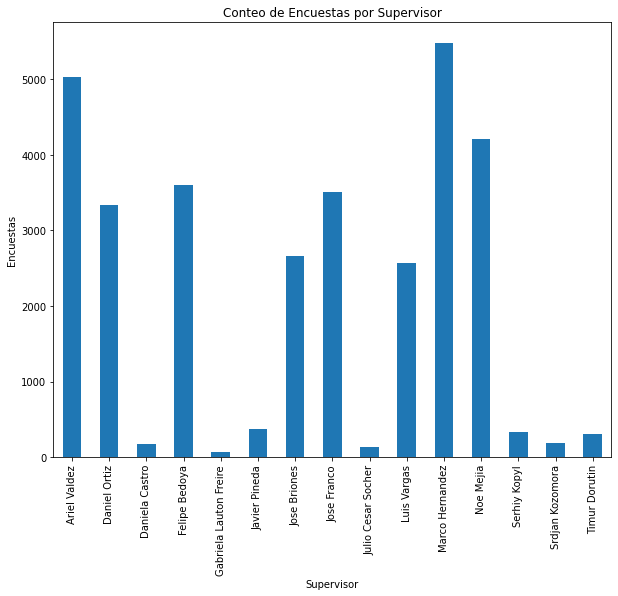

In [ ]:
#Creamos una variable para graficar con barras la cantidad de encuestas por supervisor
conteoencsup = sup['Calificación']['count']

fig1 = plt.figure(figsize=(10, 8))
ax = conteoencsup.plot.bar()
ax.set_ylabel('Encuestas')
ax.set_title('Conteo de Encuestas por Supervisor')

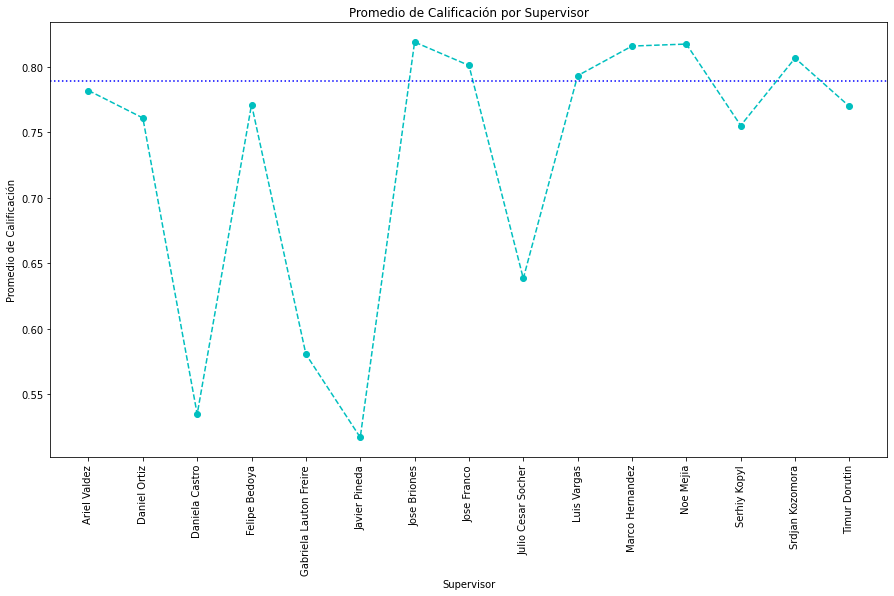

In [ ]:
#Ahora creamos una grafica lineal mostrando el promedio de cada supervisor
mediaensup = sup['Calificación']['mean']

fig2 = plt.figure(figsize=(15, 8))
ax = mediaensup.plot.line(color='c', linestyle ='dashed', marker = 'o' )
ax.set_ylabel('Promedio de Calificación')
ax.set_title('Promedio de Calificación por Supervisor')
ax.set_xticks(range(len(mediaensup.index)))
ax.set_xticklabels(mediaensup.index, rotation=90)
ax.axhline(y=df_es['Calificación'].mean(), color='b', linestyle =':') #agregamos la media de Español
plt.show()

In [ ]:
#Obtenemos la correlación entre ambos resultados
corr = conteoencsup.corr(mediaensup)
corr

0.6286963001593198

<ipython-input-25-960d887e7f9a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


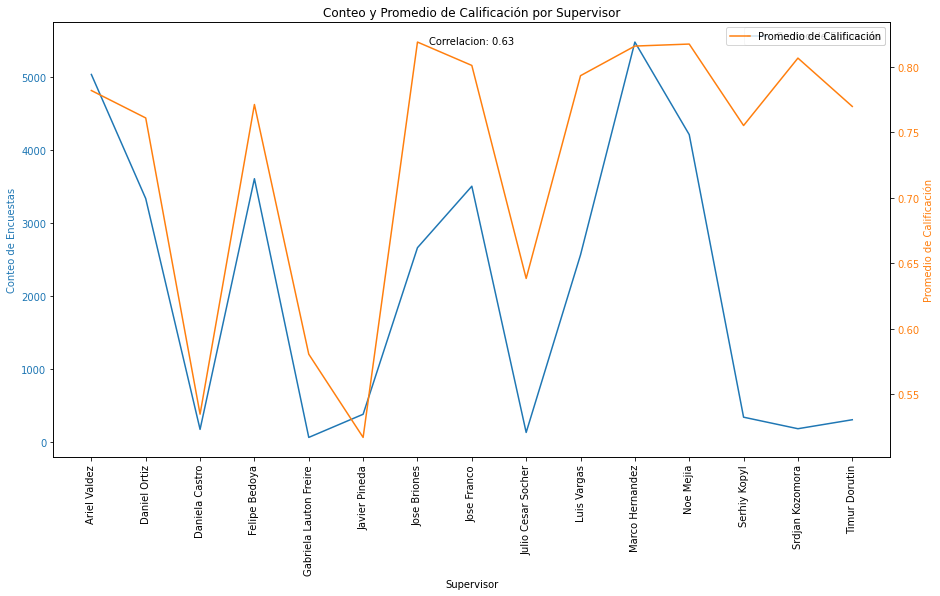

In [ ]:
#Graficamos la correlación mediante diferentes axis en Seaborn
fig, ax1 = plt.subplots(figsize=(15, 8))

sns.lineplot(x=conteoencsup.index, y=conteoencsup.values, ax=ax1, label='Conteo de Encuestas', color='tab:blue')
ax1.set_ylabel('Conteo de Encuestas', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()

sns.lineplot(x=mediaensup.index, y=mediaensup.values, ax=ax2, label='Promedio de Calificación', color='tab:orange')
ax2.set_ylabel('Promedio de Calificación', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Conteo y Promedio de Calificación por Supervisor')

corr = conteoencsup.corr(mediaensup)
ax1.text(0.5, 0.95, f'Correlacion: {corr:.2f}', transform=ax1.transAxes, ha='center')

plt.show()

## Análisis de encuestas de supervisores y agentes##

Hemos logrado encontrar con que el promedio para el lenguaje de Español es de 78.93% en los meses de nuestra base de datos. De los 15 supervisores con resultados, existen seis que están encima del promedio. Los supervisores con iniciales JB, JF, MH, NM y SK tienen una media de 78% o más.

En adición a esto, con la gráfica de correlación de cada uno de los supervisores entre la cantidad de encuestas y el promedio de calificación, podemos concluir que en la mayoría de los casos estudiados, a mayor cantidad de encuestas están acompañadas de buenas calificaciones.


In [ ]:
#De igual forma podemos ver rapidamente el promedio de Calificación de cada agente
agentemedia = df_es.groupby('Agente').mean()
agentemedia

,Calificación
Agente,
Alberto Elias-Romero,0.845638
Alberto Lopez,0.763158
Aldo Ponce,0.856764
Alejandro Jose Ventimilla Navarro,0.707483
Alexis Lagunes,0.774590
...,...
Stephanie Romero,1.000000
Timy Daniel Borjas Funez,0.468468
Valentina Cane,0.708738


In [ ]:
#Podemos asociar también Supervisor, agente y su respectiva media de calificación
dfsupagent = df_es.groupby(['Supervisor', 'Agente'])['Calificación'].mean().reset_index()
dfsupagent

,Supervisor,Agente,Calificación
0,Ariel Valdez,Amaury Perez,0.794872
1,Ariel Valdez,Daniel Esparza,0.799097
2,Ariel Valdez,Eduardo Jimenez,0.847118
3,Ariel Valdez,Eduardo Martinez,0.808130
4,Ariel Valdez,Erick Gonzalez,0.791722
...,...,...,...
139,Srdjan Kozomora,Noe Cruz,0.806630
140,Timur Dorutin,Daniel Galindo,0.774775
141,Timur Dorutin,Manuel Brihuega,0.838710
142,Timur Dorutin,Valentina Cane,0.675676


In [ ]:
#Graficamos por medio de plotly con cajas para ver la distribución calificación de cada Supervisor
fig = px.box(dfsupagent, x='Supervisor', y='Calificación', color='Supervisor',
             labels={'Supervisor':'Supervisor', 'Calificación':'Calificación Promedio'})
fig.update_layout(title='Distribución de Calificaciones Promedio por Supervisor')
fig.show()

In [ ]:
#Realizamos un graffico scatter para tambien ver el promedio de Agente y Supervisor
fig = px.scatter(dfsupagent, x="Supervisor", y="Calificación", color="Agente",
                 title="Promedio de Agente y Supervisor")
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':dfsupagent.groupby('Supervisor').mean().sort_values('Calificación')['Calificación'].index.tolist()})
fig.show()

De estas últimas representaciones, los supervisores pueden encontrar su distribución de calificación y ver que algunos de ellos poseen ciertos outliers. En la gráfica anterior podemos analizar por agente cuales es la media de cada agente y es más visible cuales son los agentes que tiene bajos resultados.

In [ ]:
#Para aprovechar los Tag podemos encontrar entonces los tags con mayor y menor conteo de calificacion
csatsuma = df_es.groupby(['Tag Primario', 'Tag Secundario'])['Calificación'].sum().reset_index()
csatsort = csatsuma.sort_values('Calificación', ascending=False)
csatsort.head(5)

,Tag Primario,Tag Secundario,Calificación
166,fn_ac_se-recovery,--compromise--,3170
158,fn_ac_se-recovery,--approve--,2602
160,fn_ac_se-recovery,--c2m--,1652
850,st_ac_se-recovery,--compromise--,1336
843,st_ac_se-recovery,--approve--,1209


In [ ]:
csatsort.tail(5)

,Tag Primario,Tag Secundario,Calificación
799,st_ac_mn-linking,--selling--,0
276,fn_ec_pm-refund,--g-assassins-creed-unity--,0
540,rl_ac_mn-parental-controls,--cm-general-inquiry--,0
1007,st_ec_pm-refund,--g-kingdom-hearts-iii--,0
820,st_ac_mn-parental-controls,--g-fifa-23--,0




---



## Hipótesis nula e hipótesis alternativa##

Como hipótesis nula ($H_0$) considero que no hay un cambio de la media de calificación entre los meses de Septiembre a Noviembre y Diciembre a Febrero.

Por otro lado, planteamos la hipótesis alternativa ($H_a$) considerando que los meses de Diciembre a Febrero tuvieron un detrimento contra la calificación media de los meses de Septiembre a Noviembre.

* Hipótesis nula $H_0: \mu_1 = \mu_2$

* Hipótesis alternativa $H_a: \mu_2 \lt \mu_1$


In [ ]:
#Para comenzar creamos una nueva columna llamada Mes que indique el mes de la encuesta
df_es['Mes'] = pd.to_datetime(df_es['Fecha CSAT']).dt.month

,Supervisor,Agente,Fecha CSAT,Calificación,Canal,Tag Primario,Tag Secundario,Mes
2190,Jose Franco,Alberto Elias-Romero,2022-09-02,1,Email,fn_gm_sh-content-management,--acv-mail--,9
2191,Jose Franco,Alberto Elias-Romero,2022-09-02,1,Email,fn_gm_sh-content-management,--compromise--,9
2192,Jose Franco,Alberto Elias-Romero,2022-09-03,1,Email,st_ac_se-recovery,--acv-mail--,9
2193,Jose Franco,Alberto Elias-Romero,2022-09-03,1,Email,st_ac_se-recovery,--compromise--,9
2194,Jose Franco,Alberto Elias-Romero,2022-09-03,1,Email,fn_gm_iq-general,--cyclops-pass--,9
...,...,...,...,...,...,...,...,...
302960,Jose Franco,Walter Cartagena,2023-02-26,1,Chat,fn_ac_mn-linking,--cyclops-pass--,2
302961,Jose Franco,Walter Cartagena,2023-02-26,1,Chat,fn_ac_mn-linking,--discretionary--,2
302962,Jose Franco,Walter Cartagena,2023-02-26,1,Chat,fn_ac_se-recovery,--acv-mail--,2
302963,Jose Franco,Walter Cartagena,2023-02-26,1,Chat,fn_ac_se-recovery,--c2m--,2


In [ ]:
#Creamos un nuevo dataFrame que contenga la media de cada mes y que se ordene de Septiembre a Febrero
dfxmes = df_es.groupby('Mes')['Calificación'].mean().reset_index()

dfxmes['Mes'] = pd.Categorical(dfxmes['Mes'], categories=[9, 10, 11, 12, 1, 2], ordered=True) #ordenamos por mes
dfxmes = dfxmes.sort_values('Mes')

dfxmes 79.84 - 78.23

,Mes,Calificación
2,9,0.810103
3,10,0.799722
4,11,0.785444
5,12,0.818236
0,1,0.759189
1,2,0.769852


In [ ]:
#Graficamos los resultados por medio de lineas
fig = px.line(dfxmes, x='Mes', y='Calificación', title='Media de Calificación por mes')
fig.update_traces(mode='markers+lines')
fig.update_layout(xaxis={'type': 'category', 'categoryorder':'array', 'categoryarray':[9, 10, 11, 12, 1, 2]})
fig.show()

In [ ]:
#Filtramos el dataFrame que vamos a usar teniendo en cuenta las fechas a analizar
dfsepanov = df_es[df_es['Mes'].isin([9,10,11])]
dfsepanov

,Supervisor,Agente,Fecha CSAT,Calificación,Canal,Tag Primario,Tag Secundario,Mes
2190,Jose Franco,Alberto Elias-Romero,2022-09-02,1,Email,fn_gm_sh-content-management,--acv-mail--,9
2191,Jose Franco,Alberto Elias-Romero,2022-09-02,1,Email,fn_gm_sh-content-management,--compromise--,9
2192,Jose Franco,Alberto Elias-Romero,2022-09-03,1,Email,st_ac_se-recovery,--acv-mail--,9
2193,Jose Franco,Alberto Elias-Romero,2022-09-03,1,Email,st_ac_se-recovery,--compromise--,9
2194,Jose Franco,Alberto Elias-Romero,2022-09-03,1,Email,fn_gm_iq-general,--cyclops-pass--,9
...,...,...,...,...,...,...,...,...
186120,Jose Franco,Walter Cartagena,2022-11-29,1,Email,fn_gm_pb-inquiry,--cyclops-pass--,11
186121,Jose Franco,Walter Cartagena,2022-11-30,1,Email,fn_gm_sh-content-management,--nintendo--,11
186122,Jose Franco,Walter Cartagena,2022-11-27,1,Chat,st_ac_se-recovery,--acv-mail--,11
186123,Jose Franco,Walter Cartagena,2022-11-27,1,Chat,st_ac_se-recovery,--c2m--,11


In [ ]:
dfdicafeb = df_es[df_es['Mes'].isin([12,1,2])]
dfdicafeb

,Supervisor,Agente,Fecha CSAT,Calificación,Canal,Tag Primario,Tag Secundario,Mes
92517,Jose Briones,Alberto Lopez,2022-12-06,1,Email,fn_ac_se-recovery,--acv-mail--,12
92518,Jose Briones,Alberto Lopez,2022-12-06,1,Email,fn_ac_se-recovery,--approve--,12
92519,Jose Briones,Alberto Lopez,2022-12-06,1,Email,fn_ac_se-recovery,--compromise--,12
92527,Jose Briones,Alberto Lopez,2022-12-01,0,Email,fn_ac_se-recovery,--acv-fail--,12
92528,Jose Briones,Alberto Lopez,2022-12-01,0,Email,fn_ac_se-recovery,--compromise--,12
...,...,...,...,...,...,...,...,...
302960,Jose Franco,Walter Cartagena,2023-02-26,1,Chat,fn_ac_mn-linking,--cyclops-pass--,2
302961,Jose Franco,Walter Cartagena,2023-02-26,1,Chat,fn_ac_mn-linking,--discretionary--,2
302962,Jose Franco,Walter Cartagena,2023-02-26,1,Chat,fn_ac_se-recovery,--acv-mail--,2
302963,Jose Franco,Walter Cartagena,2023-02-26,1,Chat,fn_ac_se-recovery,--c2m--,2


In [ ]:
#Para hacer el estadístico entonces tenemos que obtener la media de uno de los dos grupos
mediag1 = dfsepanov['Calificación'].mean() #Media del grupo 1 (Sep a Nov)
#De igual forma del grupo 2 (Dec a Feb)
mediag2 = dfdicafeb['Calificación'].mean()

In [ ]:
#Hacemos entonces un prueba t de dos muestras
t_stat, pvalor = ttest_ind(dfdicafeb['Calificación'], dfsepanov['Calificación'])

#Imprimimos hallazgos
print("Media de los meses Diciembre, Enero y Febrero: {:.2f}".format(mediag2))
print("Media de los meses Septiembre, Octubre y Noviembre: {:.2f}".format(mediag1))
print("t-statistic: {:.2f}".format(t_stat))
print("p-value: {:.4f}".format(pvalor))

Media de los meses Diciembre, Enero y Febrero: 0.78
Media de los meses Septiembre, Octubre y Noviembre: 0.80
t-statistic: -3.62
p-value: 0.0003


In [ ]:
#Conclusión
if pvalor < 0.005: #nivel de significancia
    print("La media de Calificación de los meses de Diciembre a Febrero es menor a los tres meses anteriores.")
else:
    print("No hay diferencia significativa en la media de Calificación entre los dos periodo.")


La media de Calificación de los meses de Diciembre a Febrero es menor a los tres meses anteriores.




---



# Conclusiones #

Basados en los objetivos iniciales de este proyecto podemos lograr concluir lo siguiente:


1.   En la compañía CA para los seis meses que se investigaron fue de una media de **78.93%** para sus encuestas de satisfacción. Se hallaron 15 Supervisores de los cuales **seis estuvieron encima de la media.**
2.   Para los supervisores de CA también podemos observar que tienen cierta distribución que se representó, y que de estas también vimos como **algunos de sus agentes son outliers** de esa distribución, por lo que se recomienda un seguimiento mayor a esos outliers.
3.   Adicionalmente logramos detallar que el mayor conteo de calificación recibida por el tipo de interacción fue **fn_ac_se-recovery y tag secundario --compromise--** con un total de 3170 y en su opuesto tuvimos el tag de **st_ac_mn-parental-controls.**
4.  Observamos que el mes que tuvo mejor promedio de calificación fue **Diciembre** con una media de **81.82%**, mientras que el mes que tuvo calificación mas baja fue **Enero** con **75.91%.**
5.  Logramos hacer una hipótesis nula y una hipótesis alternativa de dos grupos de datos entre tres meses consecutivos basados nuevamente en la calificación de encuestas. Como resultado obtuvimos que *la media de Calificación de los meses de Diciembre a Febrero es menor a los tres meses anteriores*. Por esta razón podemos decir con confianza que **rechazamos la hipótesis nula** y nos inclinamos por la una hipótesis alternativa






---



##Notas##

Este proyecto es sólo con fines educativos y no tiene la intención de proporcionar asesoramiento profesional o de negocios. Favor no replicar o hacer uso de los datos que se usaron en el proyecto. No se hace ninguna representación o garantía en cuanto a la exactitud o integridad de la información proporcionada en este proyecto. Cualquier acción que se tome basada en la información presentada en este proyecto es bajo su propio riesgo y responsabilidad.